In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#Load the data
import pandas as pd

train = pd.read_csv("C:\\Users\\sahil\\Downloads\\archive (1)\\train.csv")
test = pd.read_csv("C:\\Users\\sahil\\Downloads\\archive (1)\\test.csv")

print(train.shape)    # (1460, 81)
print(train.info())


(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


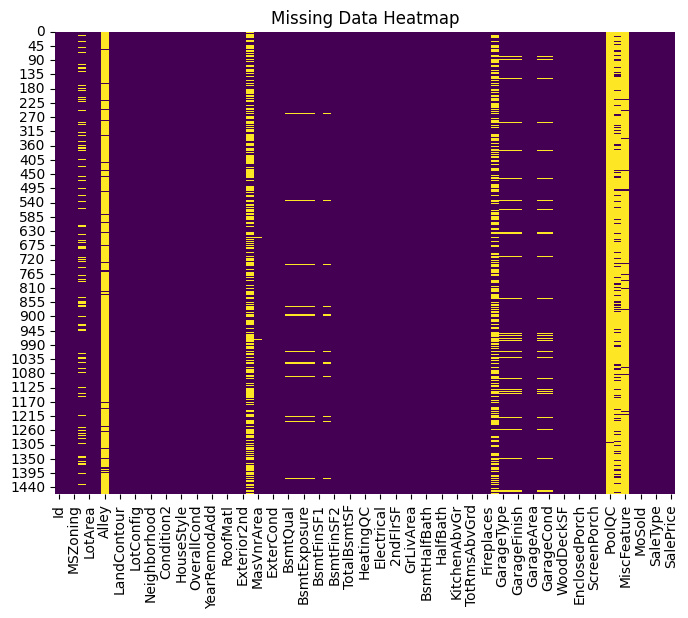

In [6]:
#Quick Overview & Missing Values
print(train['SalePrice'].describe())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


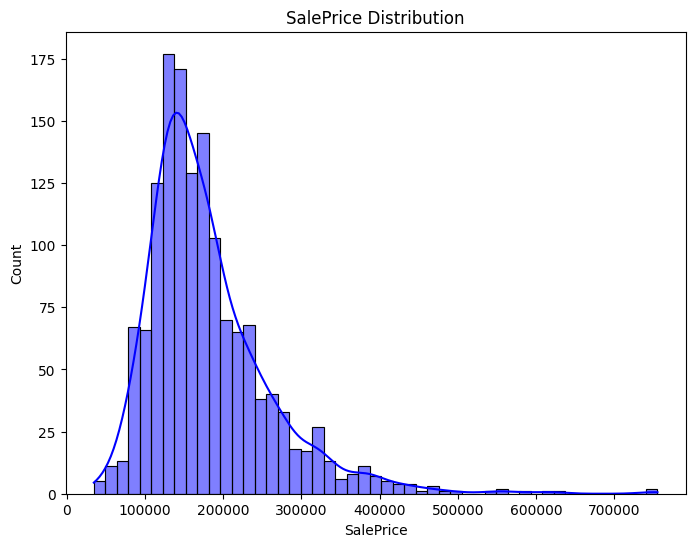

In [10]:
# Distribution of Target
plt.figure(figsize=(8, 6))
sns.histplot(train['SalePrice'], kde=True, color='blue')
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.show()


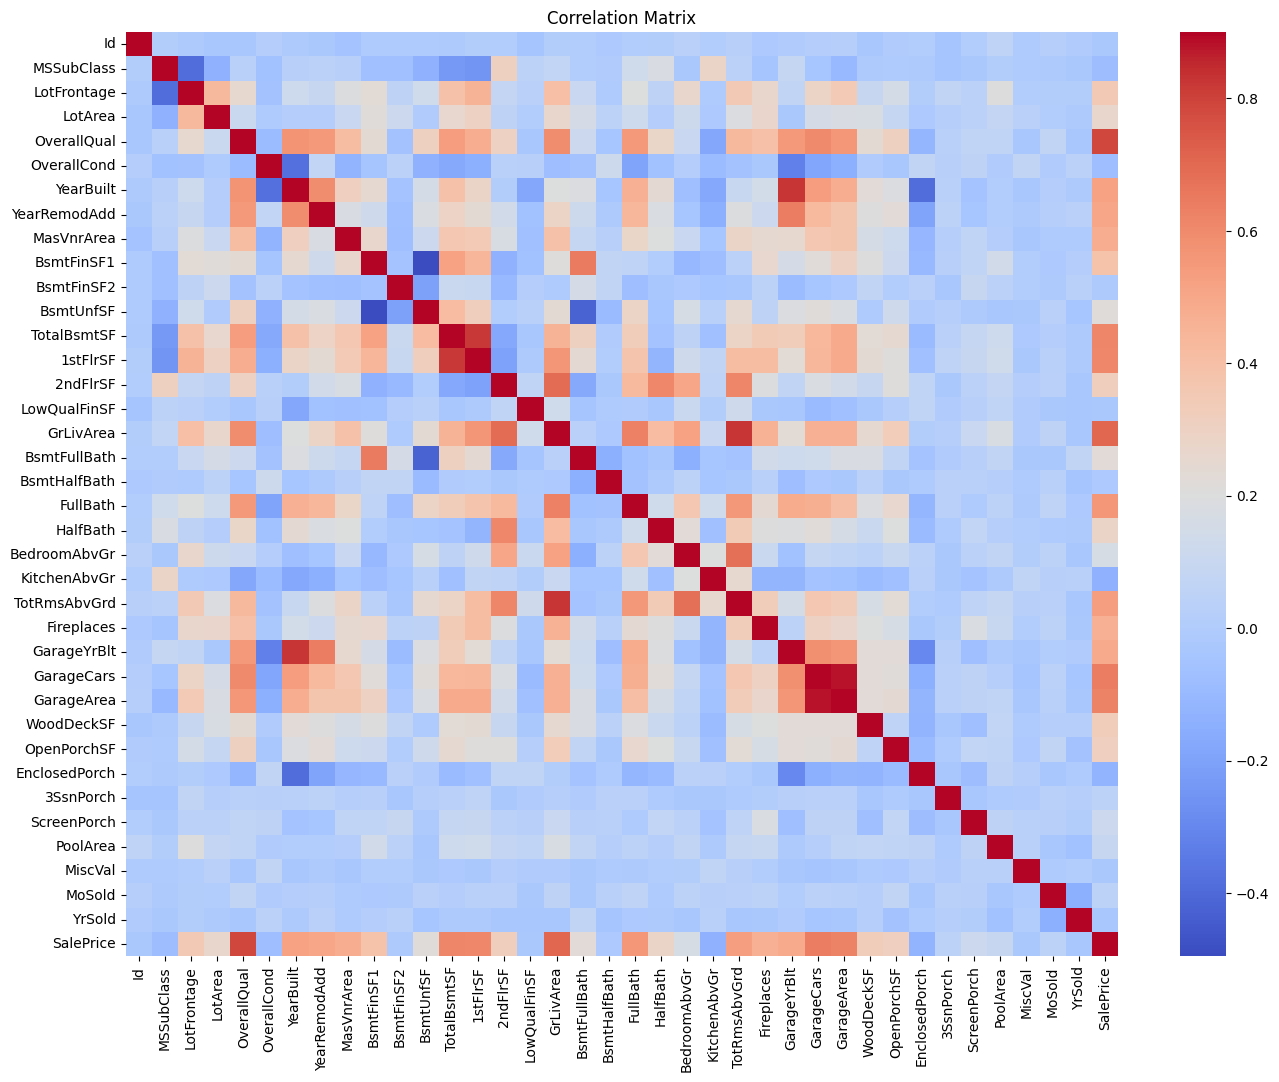

In [12]:
#Numeric Feature Correlations
corr = train.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, vmax=0.9)
plt.title('Correlation Matrix')
plt.show()


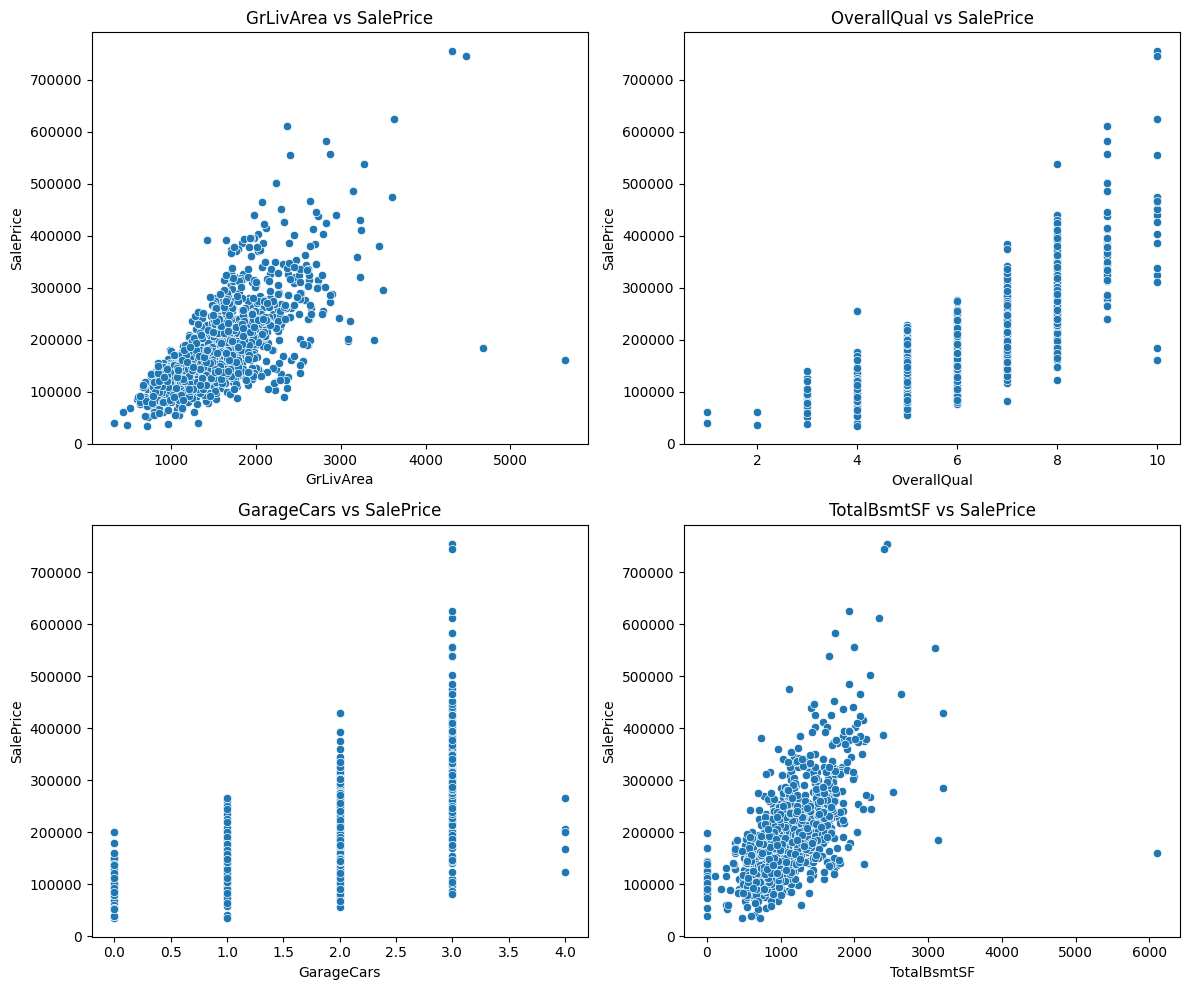

In [13]:
#Scatter plot with price
corr_features = ['GrLivArea', 'OverallQual', 'GarageCars', 'TotalBsmtSF']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(corr_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=train[feature], y=train['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
plt.tight_layout()
plt.show()


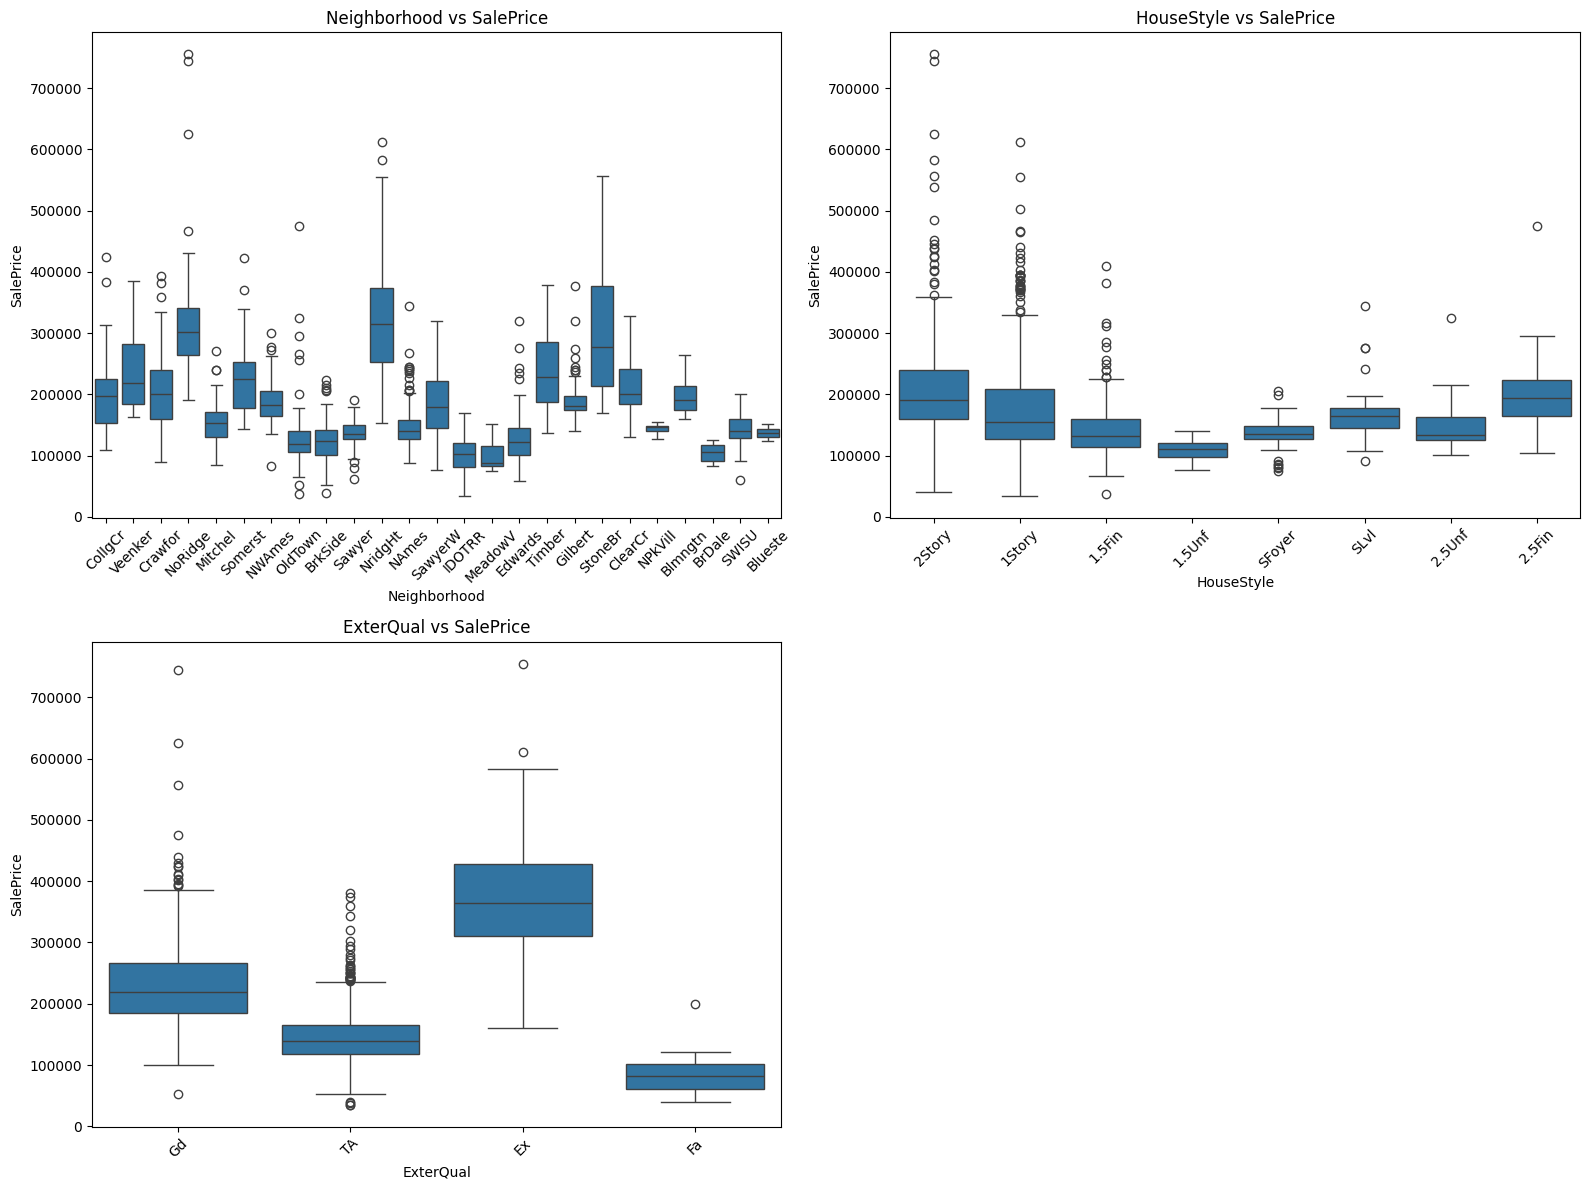

In [14]:
#Boxplots for Categorical Features
categorical = ['Neighborhood', 'HouseStyle', 'ExterQual']
plt.figure(figsize=(16, 12))
for i, cat in enumerate(categorical):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=cat, y='SalePrice', data=train)
    plt.xticks(rotation=45)
    plt.title(f'{cat} vs SalePrice')
plt.tight_layout()
plt.show()



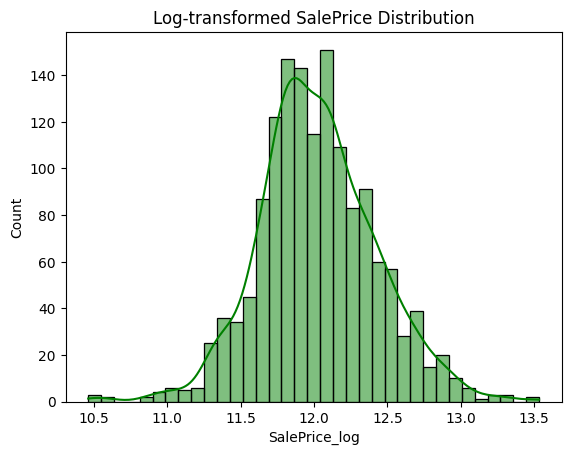

In [15]:
#Log‑Transform Skewed Features
import numpy as np
train['SalePrice_log'] = np.log1p(train['SalePrice'])
sns.histplot(train['SalePrice_log'], kde=True, color='green')
plt.title('Log‐transformed SalePrice Distribution')
plt.show()


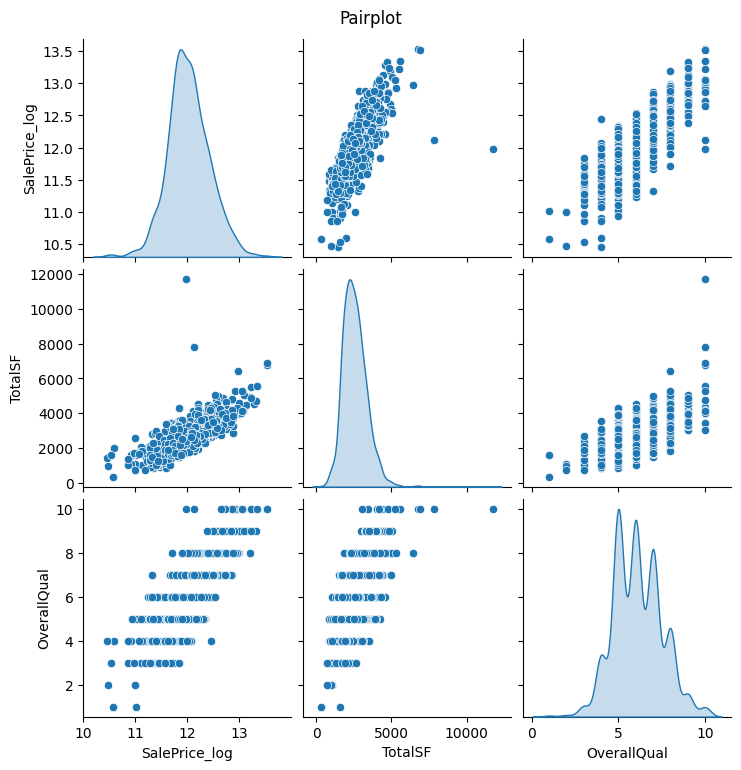

In [16]:
#Simple Feature Engineering & Pairplot
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
sns.pairplot(train[['SalePrice_log', 'TotalSF', 'OverallQual']], diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.show()


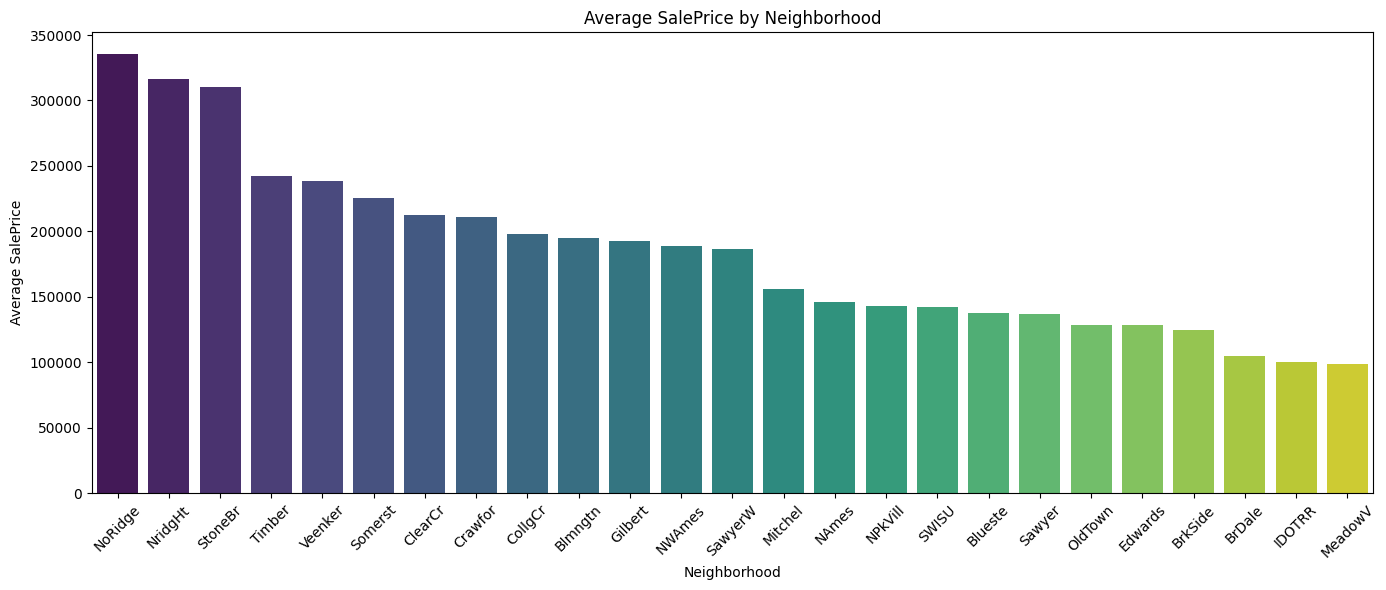

In [23]:
# Group and convert to DataFrame
neighborhood_avg = train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).reset_index()

# Plot bar chart correctly using hue (avoids warning)
plt.figure(figsize=(14, 6))
sns.barplot(data=neighborhood_avg, x='Neighborhood', y='SalePrice', hue='Neighborhood', dodge=False, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average SalePrice by Neighborhood")
plt.ylabel("Average SalePrice")
plt.xlabel("Neighborhood")
plt.legend([],[], frameon=False)  # hide legend
plt.tight_layout()
plt.show()


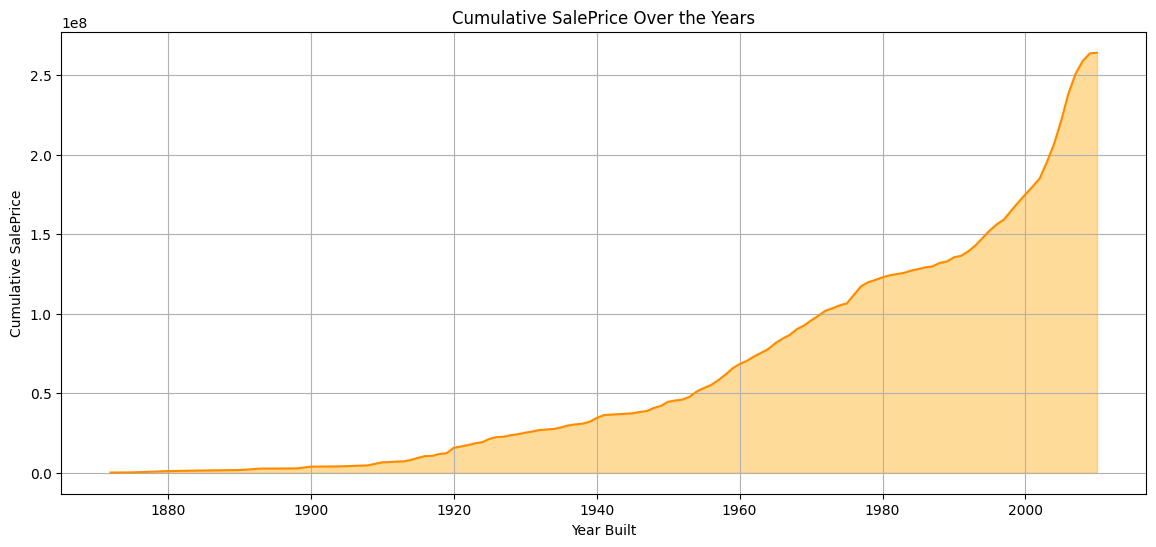

In [20]:
# Cumulative sale price over years
cumulative_sales = train.groupby('YearBuilt')['SalePrice'].sum().cumsum()

plt.figure(figsize=(14, 6))
plt.fill_between(cumulative_sales.index, cumulative_sales.values, color='orange', alpha=0.4)
plt.plot(cumulative_sales.index, cumulative_sales.values, color='darkorange')
plt.title("Cumulative SalePrice Over the Years")
plt.xlabel("Year Built")
plt.ylabel("Cumulative SalePrice")
plt.grid(True)
plt.show()


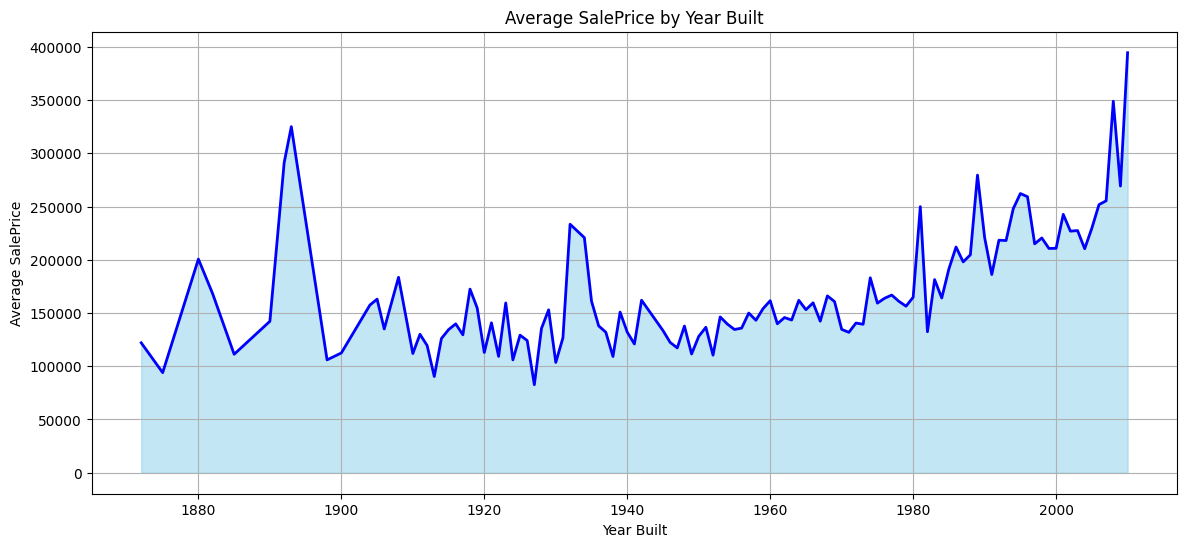

In [21]:
# Group by YearBuilt and sum or average SalePrice
yearly_sales = train.groupby('YearBuilt')['SalePrice'].mean()

# Plot area chart
plt.figure(figsize=(14, 6))
plt.fill_between(yearly_sales.index, yearly_sales.values, color='skyblue', alpha=0.5)
plt.plot(yearly_sales.index, yearly_sales.values, color='blue', linewidth=2)
plt.title("Average SalePrice by Year Built")
plt.xlabel("Year Built")
plt.ylabel("Average SalePrice")
plt.grid(True)
plt.show()
